In [1]:
# Standardization 

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [3]:
comp_df = pd.read_csv('WorkingDataFrame', index_col=0)
comp_df.head()

,I1,I2,I3,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,...,T5,S1,S2,S3,Y1,Y2,C3',C5',P(mid),C6'
0,AATI,ADVANCED ANALOGIC TECHNOLOGIES INC,3674,10.0,9.5,8.5,11.870000,122.0,1.0,3.43,...,690.0,62.0,117.0,139.0,0,1,1,3.864345,9.0,11.111111
1,ABPI,ACCENTIA BIOPHARMACEUTICALS INC,2834,8.0,10.0,8.0,7.250000,259.0,0.0,-1.62,...,1120.0,71.0,242.0,237.0,1,0,0,12.028832,9.0,0.000000
2,ACAD,ACADIA PHARMACEUTICALS INC,2834,7.0,14.0,12.0,6.700000,90.0,1.0,-1.24,...,325.0,61.0,33.0,60.0,1,0,0,3.369134,13.0,0.000000
3,ACHN,ACHILLION PHARMACEUTICALS INC,2834,11.5,16.0,14.0,12.390000,209.0,1.0,-0.91,...,509.0,80.0,59.0,110.0,1,1,0,3.299697,15.0,0.000000
4,ACLI,AMERICAN COMMERCIAL LINES INC.,4492,21.0,21.0,19.0,56.599998,80.0,1.0,0.07,...,720.0,67.0,149.0,167.0,0,1,1,3.726269,20.0,5.000000


In [4]:
df_I = comp_df.iloc[:,:3]
df_I.head()

,I1,I2,I3
0,AATI,ADVANCED ANALOGIC TECHNOLOGIES INC,3674
1,ABPI,ACCENTIA BIOPHARMACEUTICALS INC,2834
2,ACAD,ACADIA PHARMACEUTICALS INC,2834
3,ACHN,ACHILLION PHARMACEUTICALS INC,2834
4,ACLI,AMERICAN COMMERCIAL LINES INC.,4492


In [5]:
comp_df=comp_df.drop(['I1', 'I2', 'I3'], axis=1)
comp_df.head()

,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,C4,C5,C6,...,T5,S1,S2,S3,Y1,Y2,C3',C5',P(mid),C6'
0,10.0,9.5,8.5,11.870000,122.0,1.0,3.43,0.029074,40962052.0,10600000.0,...,690.0,62.0,117.0,139.0,0,1,1,3.864345,9.0,11.111111
1,8.0,10.0,8.0,7.250000,259.0,0.0,-1.62,-0.013352,28869196.0,2400000.0,...,1120.0,71.0,242.0,237.0,1,0,0,12.028832,9.0,0.000000
2,7.0,14.0,12.0,6.700000,90.0,1.0,-1.24,0.020715,16845668.0,5000000.0,...,325.0,61.0,33.0,60.0,1,0,0,3.369134,13.0,0.000000
3,11.5,16.0,14.0,12.390000,209.0,1.0,-0.91,0.020023,14848637.0,4500000.0,...,509.0,80.0,59.0,110.0,1,1,0,3.299697,15.0,0.000000
4,21.0,21.0,19.0,56.599998,80.0,1.0,0.07,-0.034895,30741716.0,8250000.0,...,720.0,67.0,149.0,167.0,0,1,1,3.726269,20.0,5.000000


In [6]:
# Get column names first
norm_names = comp_df.columns
# Create the Scaler object
scaler = preprocessing.StandardScaler()
# Fit your data on the scaler object
stand_df = scaler.fit_transform(comp_df)
stand_df = pd.DataFrame(stand_df, columns=norm_names)

In [7]:
print(stand_df)

       P(IPO)      P(H)      P(L)   P(1Day)        C1        C2         C3  \
0   -0.636323 -0.905198 -0.865043 -0.190333 -0.175193  0.397360   0.010968   
1   -0.968157 -0.829439 -0.951417 -0.254485  0.735662 -2.516611  -0.020955   
2   -1.134074 -0.223360 -0.260419 -0.262122 -0.387947  0.397360  -0.018553   
3   -0.387448  0.079679  0.085080 -0.183112  0.403233  0.397360  -0.016467   
4    1.188763  0.837277  0.948829  0.430778 -0.454433  0.397360  -0.010272   
5   -0.055614 -0.147600 -0.174044 -0.157979 -0.361353  0.397360  -0.010335   
6   -1.299991 -0.374880 -0.433168 -0.261845 -0.135301  0.397360  -0.022536   
7   -1.465908 -0.223360 -0.260419 -0.291977 -0.381299 -2.516611  -0.015393   
8    0.193262  0.382718  0.430580 -0.134373 -0.321462  0.397360  -0.013939   
9   -0.802240  0.534238  0.603329 -0.355157 -0.281570  0.397360  -0.001296   
10  -0.055614 -0.071841 -0.087669 -0.149023 -0.274922  0.397360  -0.010652   
11  -1.465908 -0.980958 -0.951417 -0.271842 -0.328110  0.397360 

In [8]:
stand_df = pd.concat([df_I, stand_df], axis=1, join_axes=[stand_df.index])
stand_df.head()

,I1,I2,I3,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,...,T5,S1,S2,S3,Y1,Y2,C3',C5',P(mid),C6'
0,AATI,ADVANCED ANALOGIC TECHNOLOGIES INC,3674,-0.636323,-0.905198,-0.865043,-0.190333,-0.175193,0.397360,0.010968,...,0.022999,-0.164165,-0.036299,-0.083026,-1.026751,0.648717,0.942972,-0.121925,-0.888512,0.541241
1,ABPI,ACCENTIA BIOPHARMACEUTICALS INC,2834,-0.968157,-0.829439,-0.951417,-0.254485,0.735662,-2.516611,-0.020955,...,0.933582,0.066365,1.439359,1.333653,0.973946,-1.541505,-1.060477,1.186213,-0.888512,-0.490559
2,ACAD,ACADIA PHARMACEUTICALS INC,2834,-1.134074,-0.223360,-0.260419,-0.262122,-0.387947,0.397360,-0.018553,...,-0.749937,-0.189780,-1.027941,-1.225043,0.973946,-1.541505,-1.060477,-0.201269,-0.241240,-0.490559
3,ACHN,ACHILLION PHARMACEUTICALS INC,2834,-0.387448,0.079679,0.085080,-0.183112,0.403233,0.397360,-0.016467,...,-0.360293,0.296895,-0.721004,-0.502248,0.973946,0.648717,-1.060477,-0.212395,0.082395,-0.490559
4,ACLI,AMERICAN COMMERCIAL LINES INC.,4492,1.188763,0.837277,0.948829,0.430778,-0.454433,0.397360,-0.010272,...,0.086528,-0.036093,0.341470,0.321739,-1.026751,0.648717,0.942972,-0.144048,0.891485,-0.026249


In [9]:
stand_df.max()

I1                 ZZ
I2         rue21, inc
P(IPO)        11.8074
P(H)          18.1105
P(L)          16.3235
P(1Day)       15.7412
C1            12.8893
C2            0.39736
C3            24.4183
C4            2.61213
C5            20.1129
C6            16.3521
C7             19.345
T1             7.3191
T2             6.6704
T3            6.73693
T4            6.29281
T5            20.3248
S1             6.1626
S2            9.72665
S3            10.6722
Y1           0.973946
Y2           0.648717
C3'          0.942972
C5'           15.2471
P(mid)         17.316
C6'           8.79564
dtype: object

In [10]:
stand_df.mean()

P(IPO)    -6.796453e-17
P(H)      -1.033712e-17
P(L)      -4.433974e-17
P(1Day)    2.755209e-17
C1         3.434854e-17
C2        -6.788314e-17
C3        -2.785223e-17
C4         1.953472e-18
C5         1.017433e-17
C6         2.506955e-17
C7        -7.439471e-17
T1        -1.111851e-16
T2        -7.020289e-17
T3        -1.168013e-16
T4         1.086619e-16
T5         5.117689e-17
S1         6.413898e-17
S2        -4.509264e-17
S3        -9.946426e-17
Y1        -3.841827e-17
Y2        -5.144142e-17
C3'        2.086959e-16
C5'       -4.944725e-17
P(mid)    -1.997628e-16
C6'        5.905182e-17
dtype: float64

In [11]:
stand_df.std()

P(IPO)     1.000734
P(H)       1.000734
P(L)       1.000734
P(1Day)    1.000734
C1         1.000734
C2         1.000734
C3         1.000734
C4         1.000734
C5         1.000734
C6         1.000734
C7         1.000734
T1         1.000734
T2         1.000734
T3         1.000734
T4         1.000734
T5         1.000734
S1         1.000734
S2         1.000734
S3         1.000734
Y1         1.000734
Y2         1.000734
C3'        1.000734
C5'        1.000734
P(mid)     1.000734
C6'        1.000734
dtype: float64

In [12]:
# Exporting DataFrame as CSV 
stand_df.to_csv('StandDF2', ',')

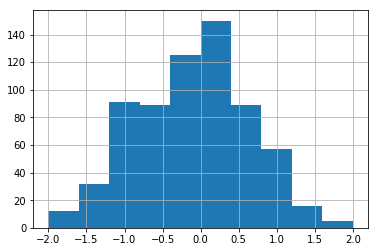

In [16]:
stand_df['P(IPO)'].hist(range=(-2,2))